#### [Raw data](http://www.soest.hawaii.edu/pibhmc/cms/data-by-location/american-samoa/)

- *Observational*: ~6 coral groups TBD; "*_TOAD". 

Note that [Rose](http://www.soest.hawaii.edu/pibhmc/cms/data-by-location/american-samoa/rose-atoll/rose-atoll-habitat/) does not have optical validation data, but does have biological characterizations from prior surveys. This may be useful for predictive comparison only.

Note that Swains does not have any biological layers available.

- *Environmental*: (in progress- TBD based on ongoing literature review); 1-6 from PIBHMC site
    1. Depth (from bty: "*_bty")
    2. Hard vs. soft bottom (from Arc ASCII file: "*_hs")
    3. Rugosity (from Arc ASCII file: "*_rugosity")
    4. Slope (from Arc ASCII file: "*_slope")
    5. Curvature (from bty)
    6. Aspect (from bty)
    7. PASS 3/19: Buildings (from PacIOOS: "*_bldngs*"; not available for Rose, Swains). Not loading properly...ignore for now
    8. Environmental sensitivity index (from PacIOOS: "AS_all/Env_sens_index")
    9. Village boundaries (from PacIOOS: "AS_all/Villages/")
    10. Distance from shore (from PacIOOS: "AS_all/Shorelines/")
    11. Wetland proximity (from PacIOOS: "AS_all/Wetlands/")
    12. Population 1960-2000 (from PacIOOS: "AS_all/Population/")
    13. ROMS u velocity (to E) (3 km resolution; from PacIOOS: "AS_all/Currents")
    14. ROMS v velocity (to N) (3 km resolution; from PacIOOS: "AS_all/Currents")

Priority locations:  Ofu-Olosega, Ta‘u, Tutuila
Secondary locations: Rose Atoll, Swains Island

All PIBHMC data is available at 5 m resolution for all locations except for Swains Island (5 m for bty, 40 m for hs, rugosity, slope). Using integrated data when available for completeness of coverage.

#### Load libraries

In [44]:
library(geojsonio)
library(raster)
library(rgdal)
library(sf)

Warning message:
"package 'geojsonio' was built under R version 3.6.3"

Attaching package: 'geojsonio'


The following object is masked from 'package:base':

    pretty




#### Load raw data

I need to...
- load the observational and predictor data for each region (OfuOlo, Rose, Swains, Tau, Tut) and all regions (AS_all)
- **choose prj, ensure projections align**- need to switch from WGS84 to UTM for distance measurements, I think...
- resample rasters to 50 m resolution
- convert TOAD shapefile to 50 m resolution raster, with all 1s prioritized, OR extract raster data to shapefile- still have the issue of overlapping 0s/1s
- exclude bathymetry values < 30 m
- impute missing data as needed

### Ofu-Olo

In [58]:
setwd("C:/Users/linds/OneDrive/Documents/samoa_corals_data/")

# Ofu-Olosega
oo_bty <-raster('OfuOlo/OfuOlo_bty/oo_dbmb_mos4.asc')
oo_hs <- raster('OfuOlo/OfuOlo_hs/ofu_5m_hs_int.asc')
oo_rug <- raster('OfuOlo/OfuOlo_rugosity/OfuOlo_5m_Rugosity.asc')
oo_slope <- raster('OfuOlo/OfuOlo_slope/OfuOlo_5m_Slope.asc')
oo_TOAD <- st_read('OfuOlo/OfuOlo_TOAD/OFU_TOAD_ALL2.shp')

Reading layer `OFU_TOAD_ALL2' from data source `C:\Users\linds\OneDrive\Documents\samoa_corals_data\OfuOlo\OfuOlo_TOAD\OFU_TOAD_ALL2.shp' using driver `ESRI Shapefile'
Simple feature collection with 3042 features and 97 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -169.6982 ymin: -14.19928 xmax: -169.5957 ymax: -14.13887
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `oo_bldngs' from data source `C:\Users\linds\OneDrive\Documents\samoa_corals_data\OfuOlo\OfuOlo_bldngs\oo_bldngs.shp' using driver `ESRI Shapefile'
Simple feature collection with 33 features and 1 field
geometry type:  POLYGON
dimension:      XYZ
bbox:           xmin: -1.797693e+308 ymin: -1.797693e+308 xmax: 0 ymax: 0
z_range:        zmin: -1.797693e+308 zmax: 0
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


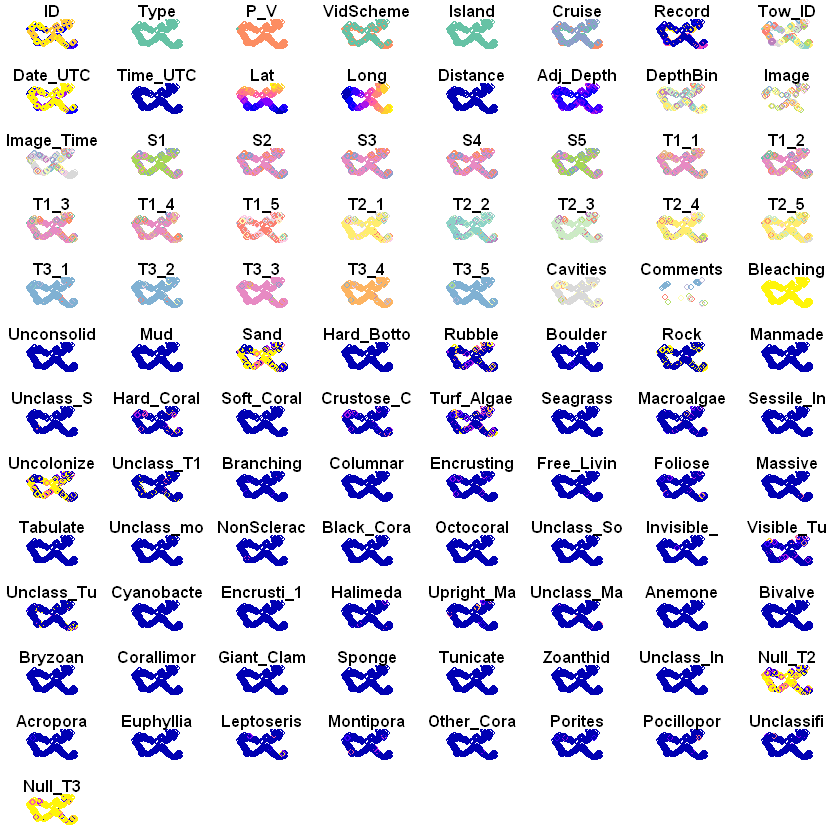

In [47]:
plot(oo_TOAD, max.plot=97)

### Tau

In [33]:
# Tau
tau_bty <-raster('Tau/Tau_bty/tau_dbmb_mos.asc')
tau_hs <- raster('Tau/Tau_hs/tau_5m_hs_int.asc')
tau_rug <- raster('Tau/Tau_rugosity/Tau_5m_Rugosity.asc')
tau_slope <- raster('Tau/Tau_slope/Tau_5m_Slope.asc')
tau_TOAD <- st_read(('Tau/Tau_TOAD/Toad_Tau_all2.shp')

In [54]:
# tau_bty # view raster attributes

class      : RasterLayer 
dimensions : 2187, 4001, 8750187  (nrow, ncol, ncell)
resolution : 5, 5  (x, y)
extent     : 651350, 671355, 8420190, 8431125  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : C:/Users/linds/OneDrive/Documents/samoa_corals_data/Tau/Tau_bty/tau_dbmb_mos.asc 
names      : tau_dbmb_mos 


### Tutuila

In [36]:
Tut_bty <-raster('Tut/Tut_bty/tut_dbmb.asc')
Tut_hs <- raster('Tut/Tut_hs/tut-re8101-unspv-5m.tif')
Tut_rug <- raster('Tut/Tut_rugosity/Tutuila_5m_Rugosity.asc')
Tut_slope <- raster('Tut/Tut_slope/Tutuila_5m_Slope.asc')
Tut_TOAD <- st_read('Tut/Tut_TOAD/tut_toad_all.shp')

### Rose Atoll

In [38]:
Rose_bty <-raster('Rose/Rose_bty/rose_5m_dbmb.asc')
Rose_hs <- raster('Rose/Rose_hs/ros_5m_hs_int.asc')
Rose_rug <- raster('Rose/Rose_rugosity/ros_5m_rug.asc')
Rose_slope <- raster('Rose/Rose_slope/ros_5m_slp.asc')

### Swains Island

In [40]:
Swains_bty <-raster('Swains/Swains_bty/swa_dbmb_5m.asc')
Swains_hs <- raster('Swains/Swains_hs/swains_40m_hardsoft.asc')
Swains_rug <- raster('Swains/Swains_rugosity/swa_40m_rug.asc')
Swains_slope <- raster('Swains/Swains_slope/swa_40m_slp.asc')

### American Samoa (all)

Reading layer `esi' from data source `C:\Users\linds\OneDrive\Documents\samoa_corals_data\AS_all\Env_sens_index\esi.shp' using driver `ESRI Shapefile'
Simple feature collection with 61 features and 5 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -170.7905 ymin: -14.33965 xmax: -169.6217 ymax: -14.17286
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `pop' from data source `C:\Users\linds\OneDrive\Documents\samoa_corals_data\AS_all\Population\pop.shp' using driver `ESRI Shapefile'
Simple feature collection with 64 features and 12 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -170.847 ymin: -14.37421 xmax: -170.5456 ymax: -14.22956
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `shore' from data source `C:\Users\linds\OneDrive\Documents\samoa_corals_data\AS_all\Shorelines\shore.shp' using driver `ESRI Shapefile'
Simple feature collection with 220 feature

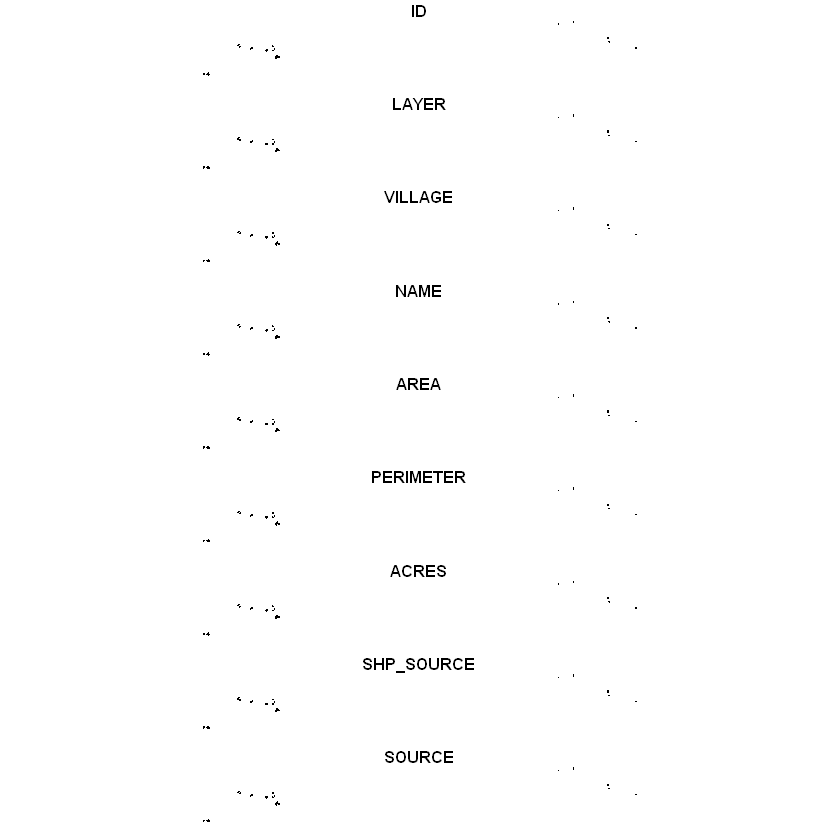

In [65]:
# currents <- 'AS_all/Currents/currents.nc'
esi <- st_read('AS_all/Env_sens_index/esi.shp')
pop <- st_read('AS_all/Population/pop.shp')
shore <- st_read('AS_all/Shorelines/shore.shp')
villages <- st_read('AS_all/Villages/villages.shp')
wetlands <- st_read('AS_all/Wetlands/wl.shp')

plot(wetlands)

#### Notes etc.

- Literature review focusing on priority, then secondary, locations; environmental characteristics of the mesophotic in these areas; mesophotic ecology
- [GeoViews walkthrough for visualization](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
- Models: standard GLM classifier, random forest classifier, possibly XGBoost or neural network
- [Metrics for evaluation](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)